<a href="https://colab.research.google.com/github/lunary403/Route_ML_Course/blob/main/Copy_of_finalRouteClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statistics

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn import metrics

from sklearn.model_selection import train_test_split

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/Bank_Personal_Loan_Modelling_classification.csv"  , encoding='latin-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   object 
 2   Experience          5000 non-null   object 
 3   Income              5000 non-null   int64  
 4   ZIP Code            4999 non-null   object 
 5   Family              5000 non-null   int64  
 6   CCAvg               4998 non-null   object 
 7   Education           5000 non-null   int64  
 8   Mortgage            4999 non-null   object 
 9   Personal Loan       5000 non-null   object 
 10  Securities Account  4997 non-null   float64
 11  Online              5000 non-null   object 
 12  CreditCard          4998 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 507.9+ KB


In [ ]:
df_shuffled = df.sample(n = len(df), random_state = 1)

In [ ]:
# No Duplicates
df_shuffled.duplicated().value_counts()

False    5000
dtype: int64

In [ ]:
df_shuffled.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,Online,CreditCard
2764,2765,31,5,84,91320,1,2.9,3,105,0,0.0,0,1
4767,4768,35,9,45,90639,3,0.9,1,101,0,1.0,0,0
3814,3815,34,9,35,94304,3,1.3,1,0,0,0.0,0,0
3499,3500,49,23,114,94550,1,0.3,1,286,0,0.0,1,0
2735,2736,36,12,70,92131,3,2.6,2,165,0,0.0,1,0


In [ ]:
# Drop ID Column
df_shuffled.drop(columns=['ID'],inplace=True)

In [ ]:
# Checking nulls
df_shuffled.isnull().mean() * 100

Age                   0.00
Experience            0.00
Income                0.00
ZIP Code              0.02
Family                0.00
CCAvg                 0.04
Education             0.00
Mortgage              0.02
Personal Loan         0.00
Securities Account    0.06
Online                0.00
CreditCard            0.04
dtype: float64

In [ ]:
df_shuffled.Age.value_counts()

35     151
43     148
52     145
58     143
54     143
50     138
41     136
30     135
56     135
34     134
39     133
59     132
57     131
51     129
45     127
60     127
46     127
42     126
55     125
40     125
31     125
62     123
29     123
61     122
32     120
44     120
33     119
48     118
49     115
38     115
47     113
53     112
63     108
36     107
37     105
28     103
27      91
65      80
64      78
26      78
25      53
24      28
66      24
67      12
23      12
?        5
Nan      1
Name: Age, dtype: int64

In [ ]:
df_shuffled.Age[df_shuffled.Age =='?'] = statistics.mode(df_shuffled['Age'])
df_shuffled.Age[df_shuffled.Age =='Nan'] = statistics.mode(df_shuffled['Age'])


In [ ]:
df_shuffled.Age.isnull().sum()

0

In [ ]:
df_shuffled['Age'] = df_shuffled['Age'].astype(str).astype(int)

In [ ]:
df_shuffled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 2764 to 235
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   object 
 2   Income              5000 non-null   int64  
 3   ZIP Code            4999 non-null   object 
 4   Family              5000 non-null   int64  
 5   CCAvg               4998 non-null   object 
 6   Education           5000 non-null   int64  
 7   Mortgage            4999 non-null   object 
 8   Personal Loan       5000 non-null   object 
 9   Securities Account  4997 non-null   float64
 10  Online              5000 non-null   object 
 11  CreditCard          4998 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 507.8+ KB


In [ ]:
df_shuffled.Experience.value_counts()

32     154
20     148
9      147
5      146
23     144
35     143
25     142
28     138
18     137
19     135
26     134
24     131
3      129
16     127
14     127
30     126
34     125
17     125
29     124
22     124
27     124
7      121
15     119
6      119
8      119
10     118
33     117
13     117
37     116
11     116
36     114
4      113
21     113
31     104
12     102
38      88
39      85
2       85
1       74
0       66
40      57
41      43
-1      33
-2      15
42       8
-3       4
43       3
Nan      1
Name: Experience, dtype: int64

In [ ]:
df_shuffled.Experience[df_shuffled.Experience =='Nan'] = 0
df_shuffled['Experience'] = df_shuffled['Experience'].astype(str).astype(int).abs()

In [ ]:
df_shuffled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 2764 to 235
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            4999 non-null   object 
 4   Family              5000 non-null   int64  
 5   CCAvg               4998 non-null   object 
 6   Education           5000 non-null   int64  
 7   Mortgage            4999 non-null   object 
 8   Personal Loan       5000 non-null   object 
 9   Securities Account  4997 non-null   float64
 10  Online              5000 non-null   object 
 11  CreditCard          4998 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 507.8+ KB


In [ ]:
df_shuffled = df_shuffled.rename(columns={'ZIP Code': 'ZIP_Code'})


In [ ]:
df_shuffled.ZIP_Code.value_counts()

94720     169
94305     127
95616     116
90095      71
93106      57
         ... 
90813       1
92694       1
Number      1
Nan         1
96145       1
Name: ZIP_Code, Length: 472, dtype: int64

In [ ]:
df_shuffled.ZIP_Code[df_shuffled.ZIP_Code =='Nan'] = 0
df_shuffled.ZIP_Code[df_shuffled.ZIP_Code =='Number'] = 0
df_shuffled.ZIP_Code[df_shuffled.ZIP_Code =='?'] = 0
df_shuffled.ZIP_Code[df_shuffled.ZIP_Code ==''] = 0
df_shuffled.ZIP_Code[df_shuffled.ZIP_Code ==' '] = 0

df_shuffled.ZIP_Code[df_shuffled.ZIP_Code =='É'] = 0

df_shuffled['ZIP_Code'] = df_shuffled['ZIP_Code'].fillna(0)

df_shuffled['ZIP_Code'] = df_shuffled['ZIP_Code'].astype(str).astype(int)

In [ ]:
df_shuffled.CCAvg.value_counts()

0.3     241
1       231
0.2     203
2       188
0.8     187
       ... 
3.25      1
8.2       1
3.33      1
9.3       1
?         1
Name: CCAvg, Length: 112, dtype: int64

In [ ]:
df_shuffled.CCAvg[df_shuffled.CCAvg =='?'] = 0
df_shuffled.CCAvg[df_shuffled.CCAvg =='Nan'] = 0
df_shuffled.CCAvg[df_shuffled.CCAvg =='Null'] = 0
df_shuffled['CCAvg'] = df_shuffled['CCAvg'].fillna(0)
df_shuffled.CCAvg[df_shuffled.CCAvg =='3,6'] = 3.6

df_shuffled['CCAvg'] = df_shuffled['CCAvg'].astype(str).astype(float)

In [ ]:
df_shuffled['Mortgage'].value_counts()

0      3461
98       17
83       16
91       16
119      16
       ... 
300       1
617       1
403       1
567       1
195       1
Name: Mortgage, Length: 350, dtype: int64

In [ ]:
df_shuffled.Mortgage[df_shuffled.Mortgage =='205,5'] = 205.5
df_shuffled.Mortgage[df_shuffled.Mortgage =='Not Found'] = 0
df_shuffled.Mortgage[df_shuffled.Mortgage =='Nan'] = 0

df_shuffled['Mortgage'].fillna(0, inplace=True)
df_shuffled['Mortgage'] = df_shuffled['Mortgage'].astype(str).astype(float)

In [ ]:
df_shuffled = df_shuffled.rename(columns={'Personal Loan': 'Personal_Loan'})

In [ ]:
df_shuffled['Personal_Loan'].value_counts

<bound method IndexOpsMixin.value_counts of 2764    0
4767    0
3814    0
3499    0
2735    0
       ..
2895    0
2763    0
905     0
3980    0
235     0
Name: Personal_Loan, Length: 5000, dtype: object>

In [ ]:
df_shuffled.Personal_Loan[df_shuffled.Personal_Loan =='?'] = 0  # statistics.mode(df_shuffled['Personal_Loan'])

In [ ]:
df_shuffled.Personal_Loan.value_counts()

0    4519
1     480
0       1
Name: Personal_Loan, dtype: int64

In [ ]:
df_shuffled['Personal_Loan'] = df_shuffled['Personal_Loan'].astype(str).astype(int)

In [ ]:
df_shuffled = df_shuffled.rename(columns={'Securities Account': 'Securities_Account'})
df_shuffled['Securities_Account'] = df_shuffled['Securities_Account'].fillna(0)
df_shuffled['Securities_Account'] = df_shuffled['Securities_Account'].astype(str).astype(float)

In [ ]:
df_shuffled.Online.value_counts()

1      2983
0      2016
one       1
Name: Online, dtype: int64

In [ ]:
df_shuffled.Online[df_shuffled.Online =='one'] = 1
df_shuffled['Online'] = df_shuffled['Online'].astype(str).astype(int)

In [ ]:
df_shuffled['CreditCard'].value_counts()

0       3527
1       1470
zero       1
Name: CreditCard, dtype: int64

In [ ]:
df_shuffled['CreditCard'] = df_shuffled['CreditCard'].fillna(0)
df_shuffled.CreditCard[df_shuffled.CreditCard =='zero'] = 0
df_shuffled['CreditCard'] = df_shuffled['CreditCard'].astype(str).astype(int)

In [ ]:
df_shuffled.info()

# no nulls :)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 2764 to 235
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP_Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   float64
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   float64
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 507.8 KB


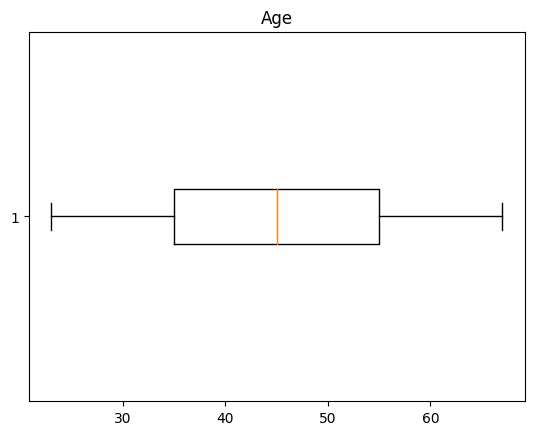

In [ ]:
# Checking for outliers using visulization with BoxPlot


plt.boxplot(df_shuffled['Age'] , vert=False)
plt.title("Age")
plt.show()

# has no outlier

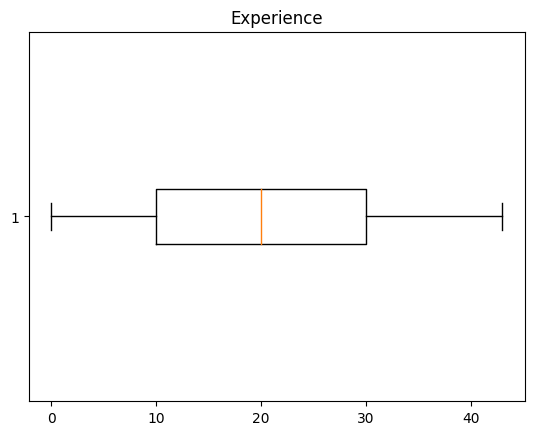

In [ ]:
plt.boxplot(df_shuffled['Experience'] , vert=False)
plt.title("Experience")
plt.show()

# has no outlier

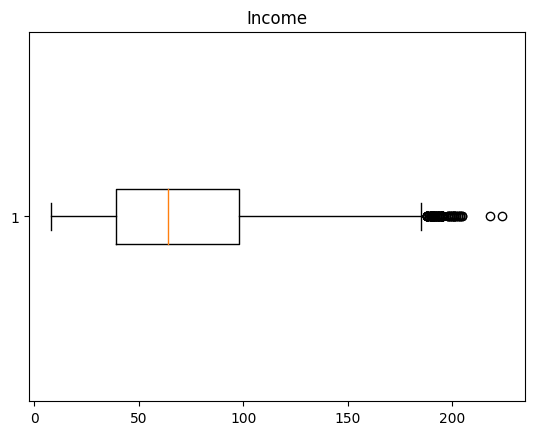

In [ ]:
plt.boxplot(df_shuffled['Income'] , vert=False)
plt.title("Income")
plt.show()

# Income has outliers

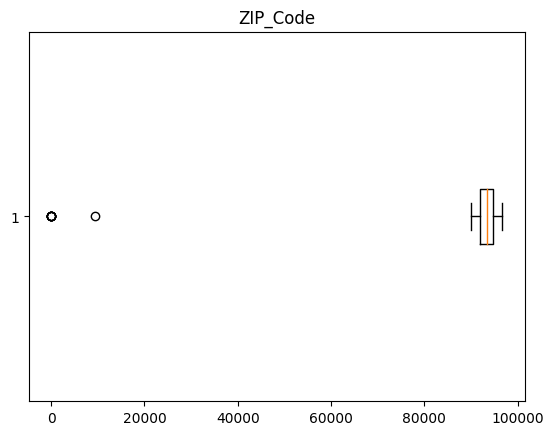

In [ ]:
plt.boxplot(df_shuffled['ZIP_Code'] , vert=False)
plt.title("ZIP_Code")
plt.show()

# Zip_Code has outliers

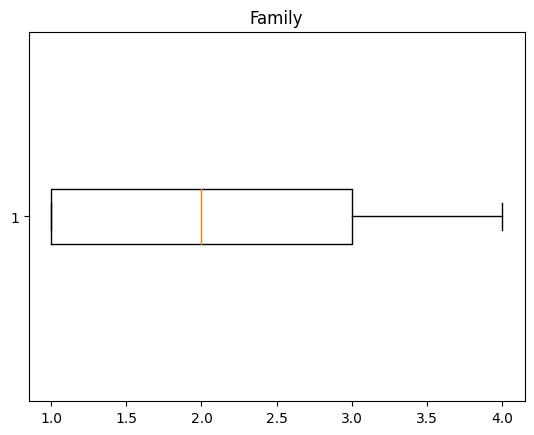

In [ ]:
plt.boxplot(df_shuffled['Family'] , vert=False)
plt.title("Family")
plt.show()

# has no outlier

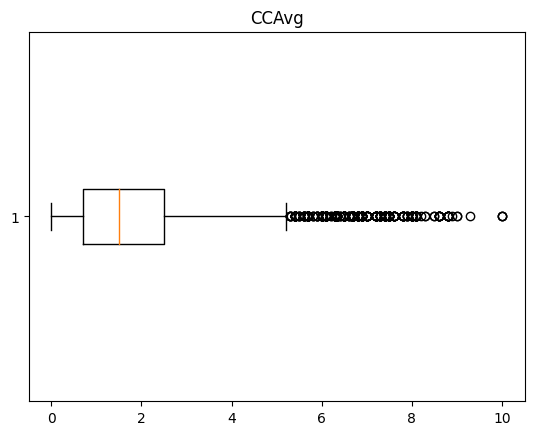

In [ ]:
plt.boxplot(df_shuffled['CCAvg'] , vert=False)
plt.title("CCAvg")
plt.show()

# CCAvg has outliers

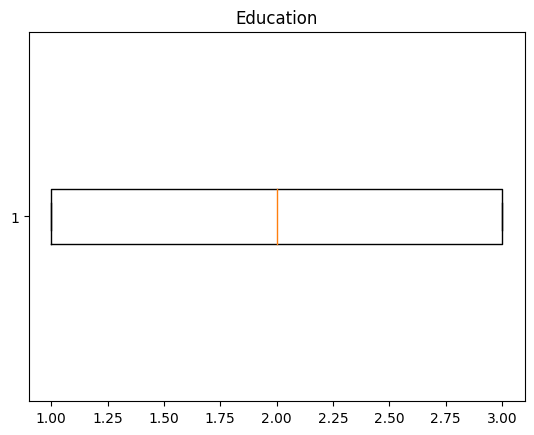

In [ ]:
plt.boxplot(df_shuffled['Education'] , vert=False)
plt.title("Education")
plt.show()

# has no outlier

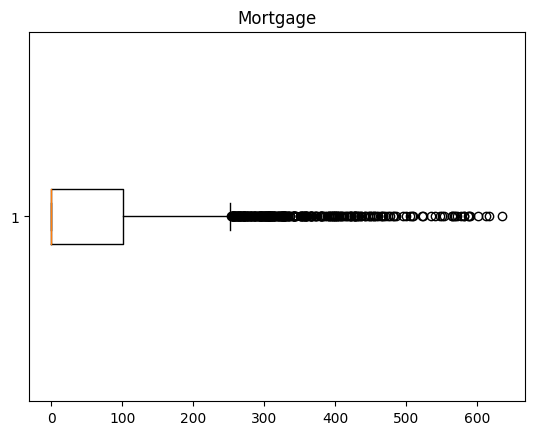

In [ ]:
plt.boxplot(df_shuffled['Mortgage'] , vert=False)
plt.title("Mortgage")
plt.show()

# Mortgage has outliers

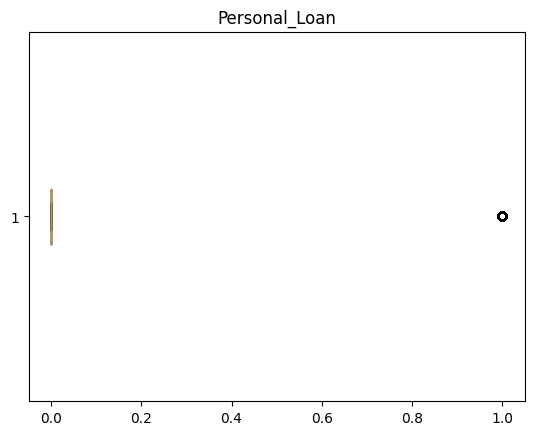

In [ ]:
plt.boxplot(df_shuffled['Personal_Loan'] , vert=False)
plt.title("Personal_Loan")
plt.show()

# considered value 1 is outlier because its low percentage in data but it is not an outlier!

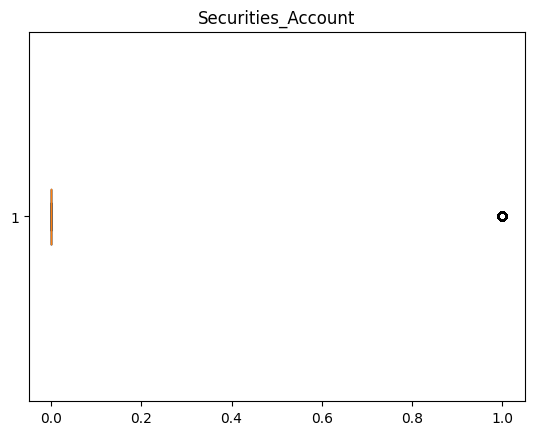

In [ ]:
plt.boxplot(df_shuffled['Securities_Account'] , vert=False)
plt.title("Securities_Account")
plt.show()

# considered value 1 is outlier because its low percentage in data but it is not an outlier!

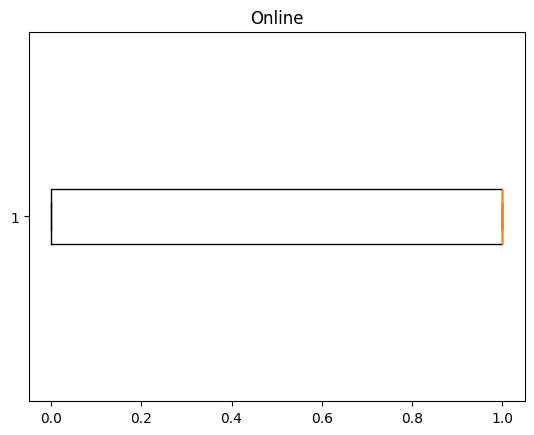

In [ ]:
plt.boxplot(df_shuffled['Online'] , vert=False)
plt.title("Online")
plt.show()

# has no outlier

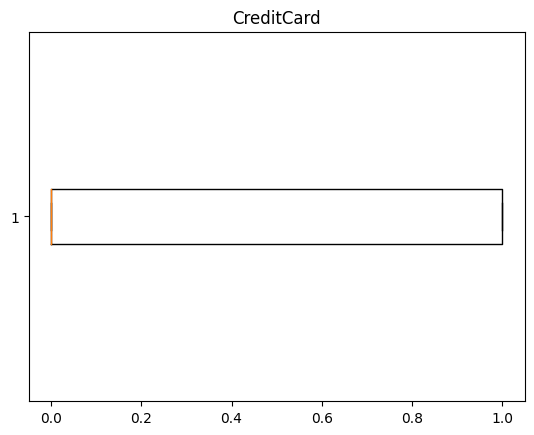

In [ ]:
plt.boxplot(df_shuffled['CreditCard'] , vert=False)
plt.title("CreditCard")
plt.show()

# has no outlier

In [ ]:
# Function to remove outliers
def winsorize_outliers(data, iqr_multiplier=1.5):
    # Calculate the quartiles and IQR
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1

    # Calculate the upper and lower whisker values
    upper_whisker = q3 + (iqr_multiplier * iqr)
    lower_whisker = q1 - (iqr_multiplier * iqr)

    # Winsorize the data
    data[data > upper_whisker] = upper_whisker
    data[data < lower_whisker] = lower_whisker

    return data

In [ ]:
# Applying Function on columns that have outliers
df_shuffled['Income'] = winsorize_outliers(df_shuffled['Income'])
df_shuffled['ZIP_Code'] = winsorize_outliers(df_shuffled['ZIP_Code'])
df_shuffled['CCAvg'] = winsorize_outliers(df_shuffled['CCAvg'])
df_shuffled['Mortgage'] = winsorize_outliers(df_shuffled['Mortgage'])


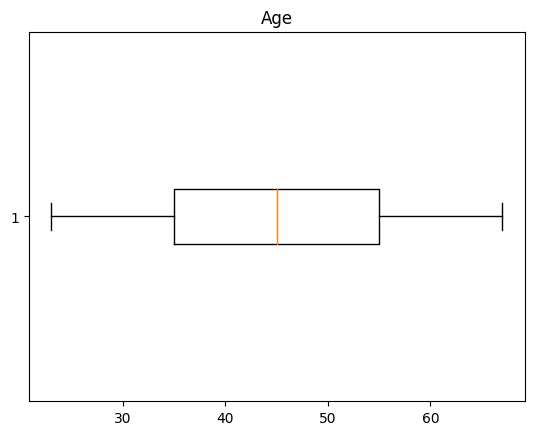

In [ ]:
# Check if outliers still exist
plt.boxplot(df_shuffled['Age'] , vert=False)
plt.title("Age")
plt.show()

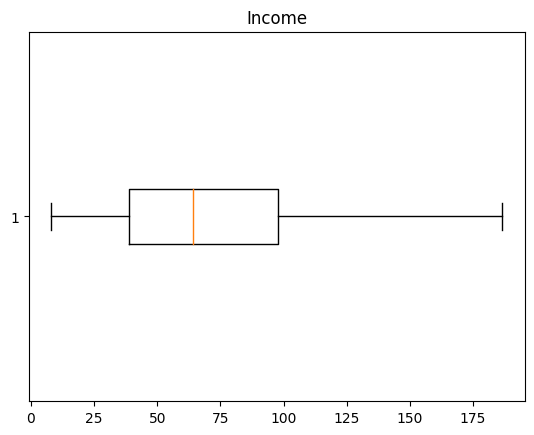

In [ ]:
plt.boxplot(df_shuffled['Income'] , vert=False)
plt.title("Income")
plt.show()

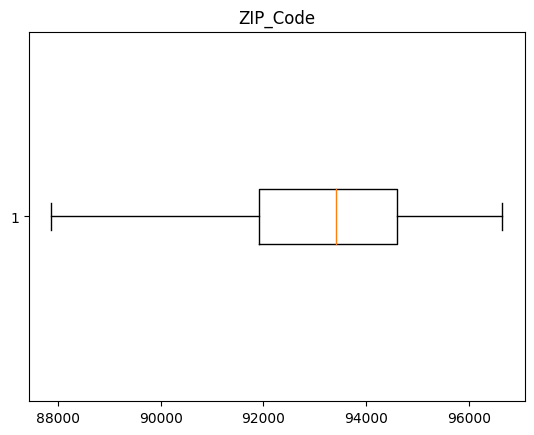

In [ ]:
plt.boxplot(df_shuffled['ZIP_Code'] , vert=False)
plt.title("ZIP_Code")
plt.show()

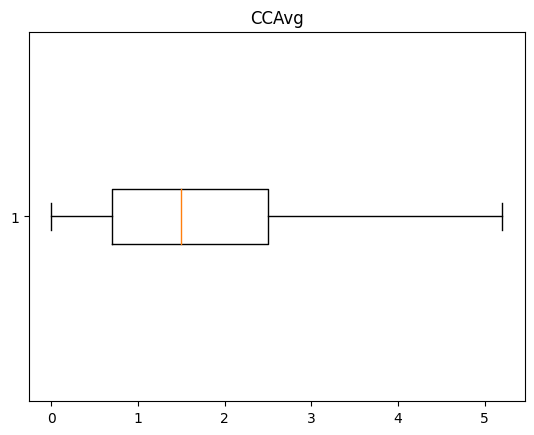

In [ ]:
plt.boxplot(df_shuffled['CCAvg'] , vert=False)
plt.title("CCAvg")
plt.show()

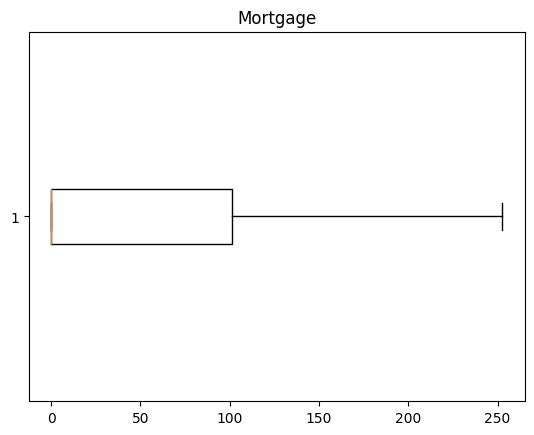

In [ ]:
plt.boxplot(df_shuffled['Mortgage'] , vert=False)
plt.title("Mortgage")
plt.show()

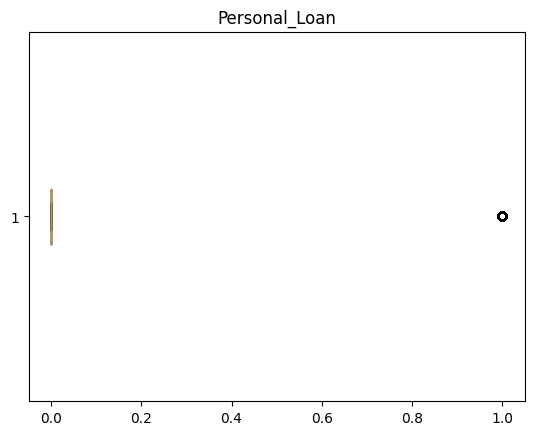

In [ ]:
plt.boxplot(df_shuffled['Personal_Loan'] , vert=False)
plt.title("Personal_Loan")
plt.show()

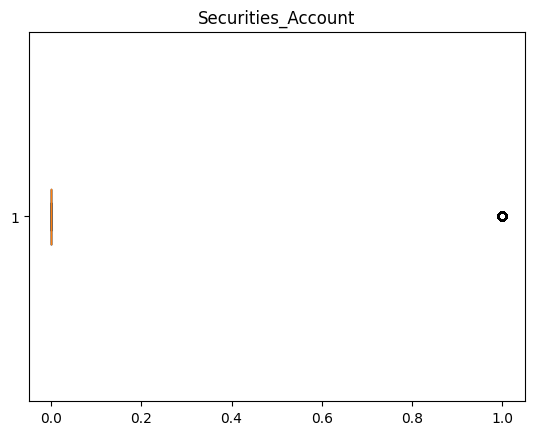

In [ ]:
plt.boxplot(df_shuffled['Securities_Account'] , vert=False)
plt.title("Securities_Account")
plt.show()

In [ ]:
### statistics

# 1) Variance

# -----------------------------------------------------
# data in these columns considered dispersed.
Age = df_shuffled['Age'].var()
print ("Age var : ", Age)

Experience = df_shuffled['Experience'].var()
print ("Experience var : ", Experience)

Income = df_shuffled['Income'].var()
print ("Income var : ", Income)

Mortgage = df_shuffled['Mortgage'].var()
print ("Mortgage var : ", Mortgage)

ZIP_Code = df_shuffled['ZIP_Code'].var()
print ("ZIP_Code var : ", ZIP_Code)


# ---------------------------------------------------
# data is close to each other in these columns
Family = df_shuffled['Family'].var()
print ("Family var : ", Family)

CCAvg = df_shuffled['CCAvg'].var()
print ("CCAvg var : ", CCAvg)

Education = df_shuffled['Education'].var()
print ("Education var : ", Education)

Securities_Account = df_shuffled['Securities_Account'].var()
print ("Securities_Account var : ", Securities_Account)

Online = df_shuffled['Online'].var()
print ("Online var : ", Online)

CreditCard = df_shuffled['CreditCard'].var()
print ("CreditCard var : ", CreditCard)

Personal_Loan = df_shuffled['Personal_Loan'].var()
print ("Personal_Loan var : ", Personal_Loan)


Age var :  131.41232390478095
Experience var :  130.37818299659932
Income var :  2081.742965833166
Mortgage var :  6888.383181876375
ZIP_Code var :  3134924.3056233646
Family var :  1.3171304660932186
CCAvg var :  2.1113584389037805
Education var :  0.705380076015203
Securities_Account var :  0.09336103220644129
Online var :  0.2406778955791158
CreditCard var :  0.20760552110422079
Personal_Loan var :  0.08680136027205441


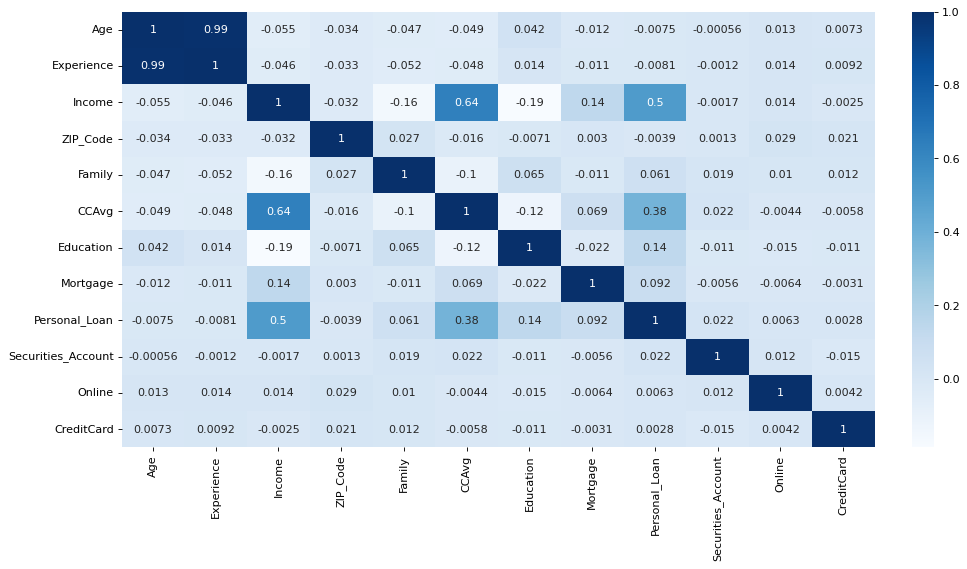

In [ ]:
# Visualization

# 1) Heat-Map
corr = df_shuffled.corr()

# Create heatmap to visualize correlation matrix
plt.figure(figsize=(12,7), layout='constrained',dpi=80)
sns.heatmap(corr, annot=True, cmap="Blues")

# Display heatmap
plt.show()

# we conclude that there is a +ve correlation between:
    # 1- ccAvg & personal loan
    # 2- Income & personal loan
    # 3- Income & ccAvg
    # 4- Age & Experience are highly corelated //

# which means that by increasing income the average spending on credit cards increase which increase the percentage of accepting personal loans offer.

# we also conclude that there is a slight -ve correlation between
    # 1- family & income
    # 2- education & income
    # 3- ccavg & education

# which means the level of education affects the income

<function matplotlib.pyplot.show(close=None, block=None)>

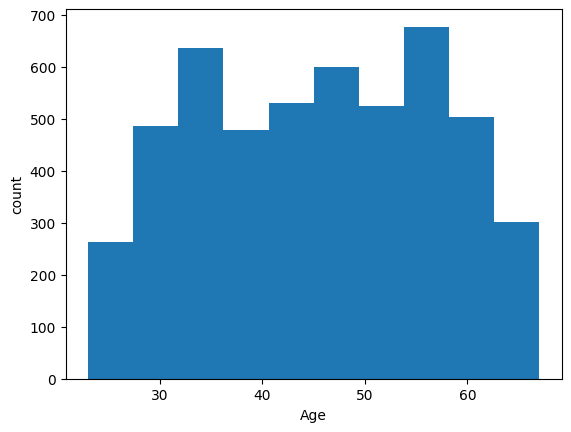

In [ ]:
#Visualization
# 2) Histogram
plt.hist(df_shuffled['Age'])
plt.xlabel('Age')
plt.ylabel('count')
plt.show

# left-skewed

<function matplotlib.pyplot.show(close=None, block=None)>

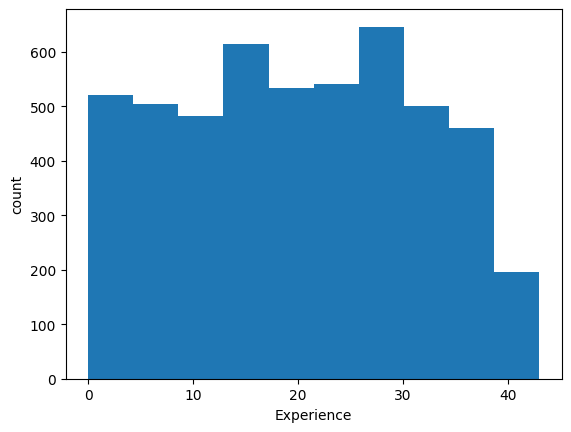

In [ ]:
plt.hist(df_shuffled['Experience'])
plt.xlabel('Experience')
plt.ylabel('count')
plt.show

# relatively close

<function matplotlib.pyplot.show(close=None, block=None)>

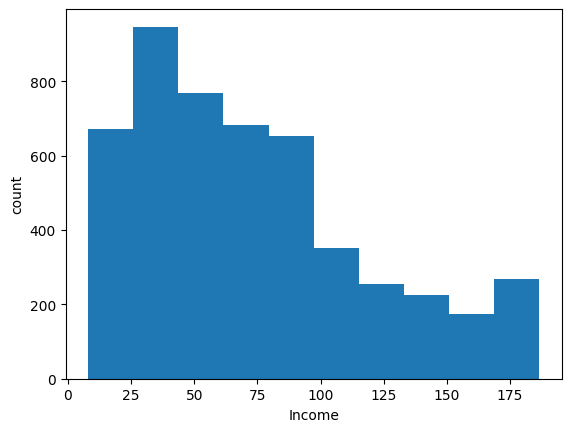

In [ ]:
plt.hist(df_shuffled['Income'])
plt.xlabel('Income')
plt.ylabel('count')
plt.show

# right-skewed

<function matplotlib.pyplot.show(close=None, block=None)>

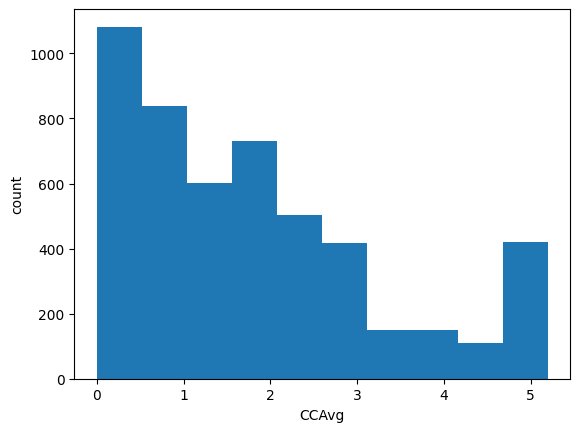

In [ ]:

plt.hist(df_shuffled['CCAvg'])
plt.xlabel('CCAvg')
plt.ylabel('count')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

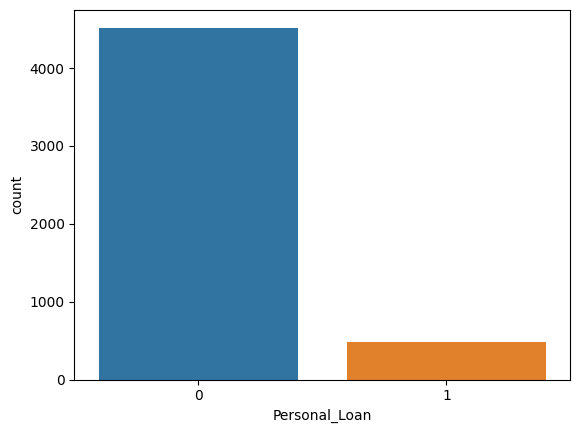

In [ ]:
# 3) CountPlot
sns.countplot(data=df_shuffled, x='Personal_Loan')
plt.show

# most of customers didn't accept the personal loan offer!

<function matplotlib.pyplot.show(close=None, block=None)>

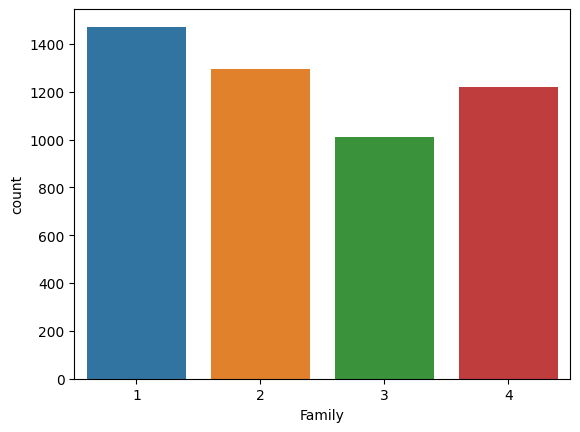

In [ ]:
sns.countplot(data=df_shuffled, x='Family')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

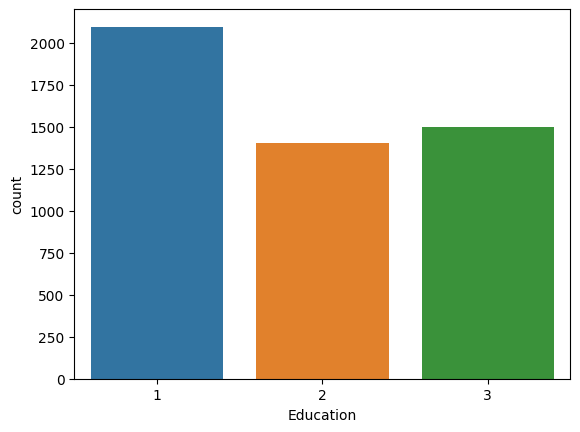

In [ ]:
sns.countplot(data=df_shuffled, x='Education')
plt.show

# undergrads dominates the data

<function matplotlib.pyplot.show(close=None, block=None)>

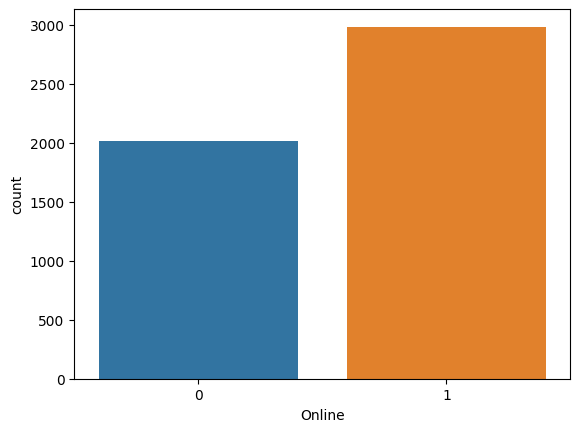

In [ ]:
sns.countplot(data=df_shuffled, x='Online')
plt.show

# most of customers use internet banking facilities

<function matplotlib.pyplot.show(close=None, block=None)>

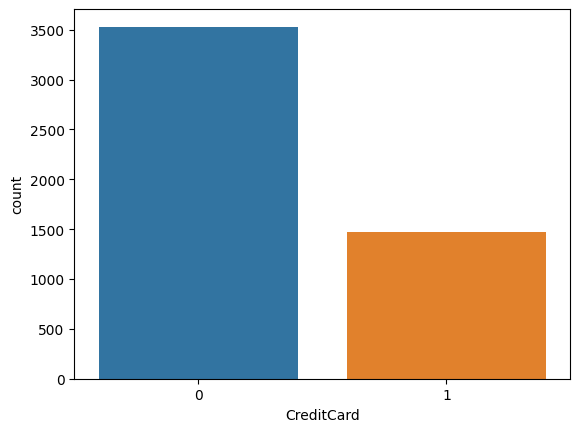

In [ ]:
sns.countplot(data=df_shuffled, x='CreditCard')
plt.show

# most of customers doesn't use credit card issued by this bank

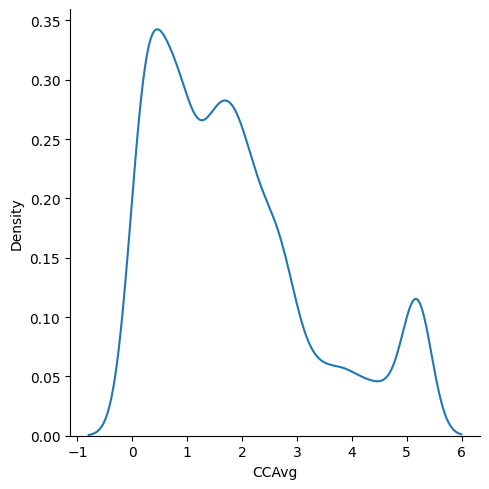

In [ ]:
# 4) Density plot
sns.displot(df_shuffled['CCAvg'],kind="kde")

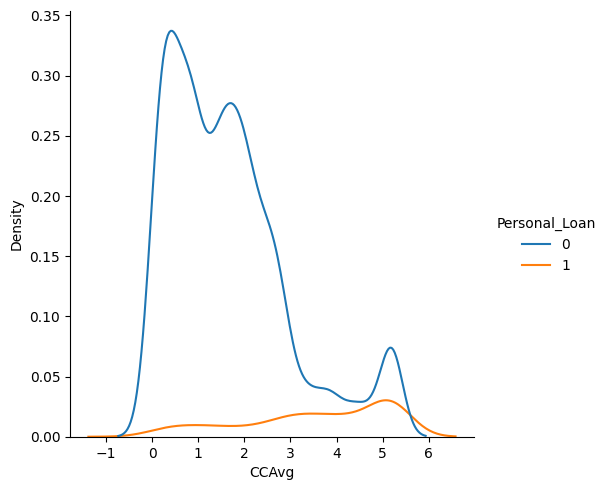

In [ ]:
sns.displot(x = 'CCAvg', hue='Personal_Loan',data=df_shuffled, kind='kde')
# ensuring that increase in CCAvg leads to increase accepting the offer

# yet the percentage of refusing offers is high

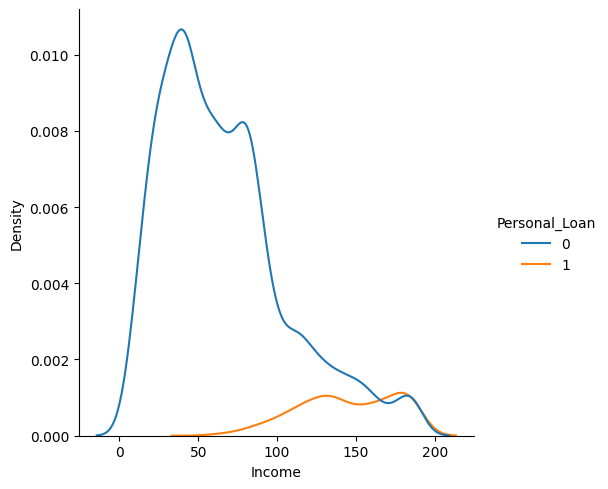

In [ ]:
sns.displot(x = 'Income', hue='Personal_Loan',data=df_shuffled, kind='kde')
# ensuring that increase in income leads to increase accepting the offer

Text(0.5, 1.0, 'CCAvg vs. Income')

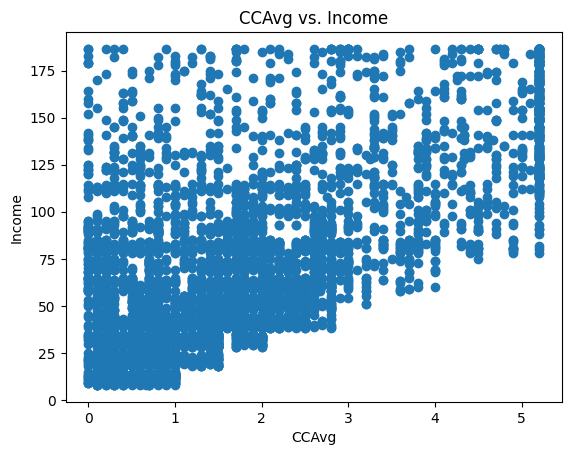

In [ ]:
# -5 scatter plot
plt.scatter(x = df_shuffled['CCAvg'], y = df_shuffled['Income'])
plt.xlabel("CCAvg")
plt.ylabel("Income")
plt.title("CCAvg vs. Income")

#ensuring that spending average on credit card is high with high income and vice versa!

Text(0.5, 1.0, 'Experience vs. Age')

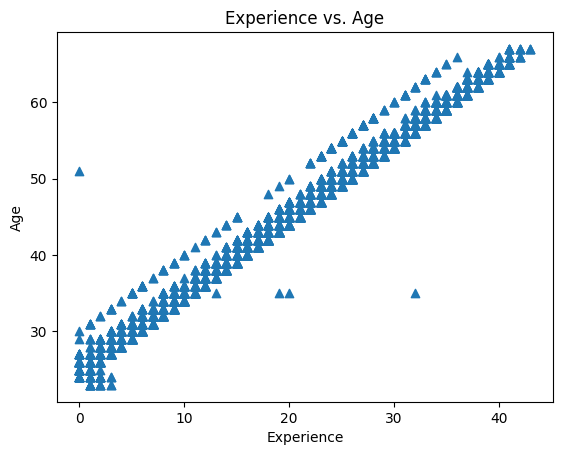

In [ ]:
plt.scatter(x = df_shuffled['Experience'], y = df_shuffled['Age'],marker='^')
plt.xlabel("Experience")
plt.ylabel("Age")
plt.title("Experience vs. Age")

# +ve correlation

In [ ]:
df_shuffled = df_shuffled[['Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account','Online', 'CreditCard', 'Personal_Loan' ]]

In [ ]:
X = df_shuffled.drop('Personal_Loan', axis=1)
y = df_shuffled['Personal_Loan']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(random_state=1).fit(X_train, y_train)
y_val_pred = clf.predict(X_val)
y_test_pred = clf.predict(X_test)

val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Validation accuracy:", val_accuracy)
print("Test accuracy:", test_accuracy)


Validation accuracy: 0.9026666666666666
Test accuracy: 0.9066666666666666


In [ ]:
#SVM

from sklearn import svm
from sklearn.metrics import accuracy_score


sv = svm.SVC(kernel='linear', random_state=1).fit(X_train, y_train)
y_val_pred = sv.predict(X_val)
y_test_pred = sv.predict(X_test)

val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy =accuracy_score(y_test, y_test_pred)

print("Validation accuracy:", val_accuracy)
print("Test accuracy:", test_accuracy)

Validation accuracy: 0.9066666666666666
Test accuracy: 0.9093333333333333


In [ ]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

RFC = RandomForestClassifier(random_state=1)
RFC.fit(X_train, y_train)

    # Make predictions on the validation and test data
y_val_pred = RFC.predict(X_val)
y_test_pred = RFC.predict(X_test)

    # Evaluate the model on the validation and test data
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Validation accuracy:", val_accuracy)
print("Test accuracy:", test_accuracy)

Validation accuracy: 0.9826666666666667
Test accuracy: 0.9893333333333333


In [ ]:
#decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

DTC = DecisionTreeClassifier(random_state=1)
DTC.fit(X_train, y_train)

y_val_pred = DTC.predict(X_val)
y_test_pred = DTC.predict(X_test)

val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Validation accuracy:", val_accuracy)
print("Test accuracy:", test_accuracy)


Validation accuracy: 0.984
Test accuracy: 0.9813333333333333


In [ ]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

KNC = KNeighborsClassifier(n_neighbors=25)
KNC.fit(X_train, y_train)


y_val_pred = KNC.predict(X_val)
y_test_pred = KNC.predict(X_test)


val_accuracy = accuracy_score(y_val,y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Validation accuracy:", val_accuracy)
print("Test accuracy:", test_accuracy)

Validation accuracy: 0.904
Test accuracy: 0.9
